<a href="https://colab.research.google.com/github/aqsa-isha/Predicting-NBA-Player-Performance-/blob/main/nba_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file
nba_data = pd.read_csv('all_seasons.csv')

In [3]:
# First five rows of dataset
nba_data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [4]:
# Last five rows of dataset
nba_data.tail()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23
12843,12843,JaMychal Green,GSW,33.0,205.74,102.965384,Alabama,USA,Undrafted,Undrafted,...,6.4,3.6,0.9,-8.2,0.087,0.164,0.169,0.650,0.094,2022-23


In [5]:
# Shape of the dataset
nba_data.shape

(12844, 22)

In [6]:
# Information of dataset
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [7]:
# display summary statistics of dataset
nba_data.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [8]:
# Check for missing valuesz
nba_data.isnull().sum()

,0
Unnamed: 0,0
player_name,0
team_abbreviation,0
age,0
player_height,0
player_weight,0
college,1854
country,0
draft_year,0
draft_round,0


In [9]:
nba_data.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [10]:
# Display the data types of each column in the DataFrame
nba_data.dtypes

,0
Unnamed: 0,int64
player_name,object
team_abbreviation,object
age,float64
player_height,float64
player_weight,float64
college,object
country,object
draft_year,object
draft_round,object


### Data Preprocessing

In [11]:
# Convert string labels into numerical values
# List of columns to convert
draft_columns = ['draft_year', 'draft_round', 'draft_number']

# Convert specified columns to numeric, coerce errors to NaN, replace NaNs with 0, and cast to int
nba_data[draft_columns] = nba_data[draft_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Display the data types of all columns after the conversion
print(nba_data.dtypes)


Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year             int64
draft_round            int64
draft_number           int64
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object


### Drop irrevalent columns


In [12]:
columns_to_drop = ['Unnamed: 0', 'team_abbreviation', 'college', 'country', 'season']
nba_data.drop(columns=columns_to_drop, axis=1, inplace=True, errors= 'ignore')
nba_data.columns

Index(['player_name', 'age', 'player_height', 'player_weight', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

### Exploratory Data Analysis

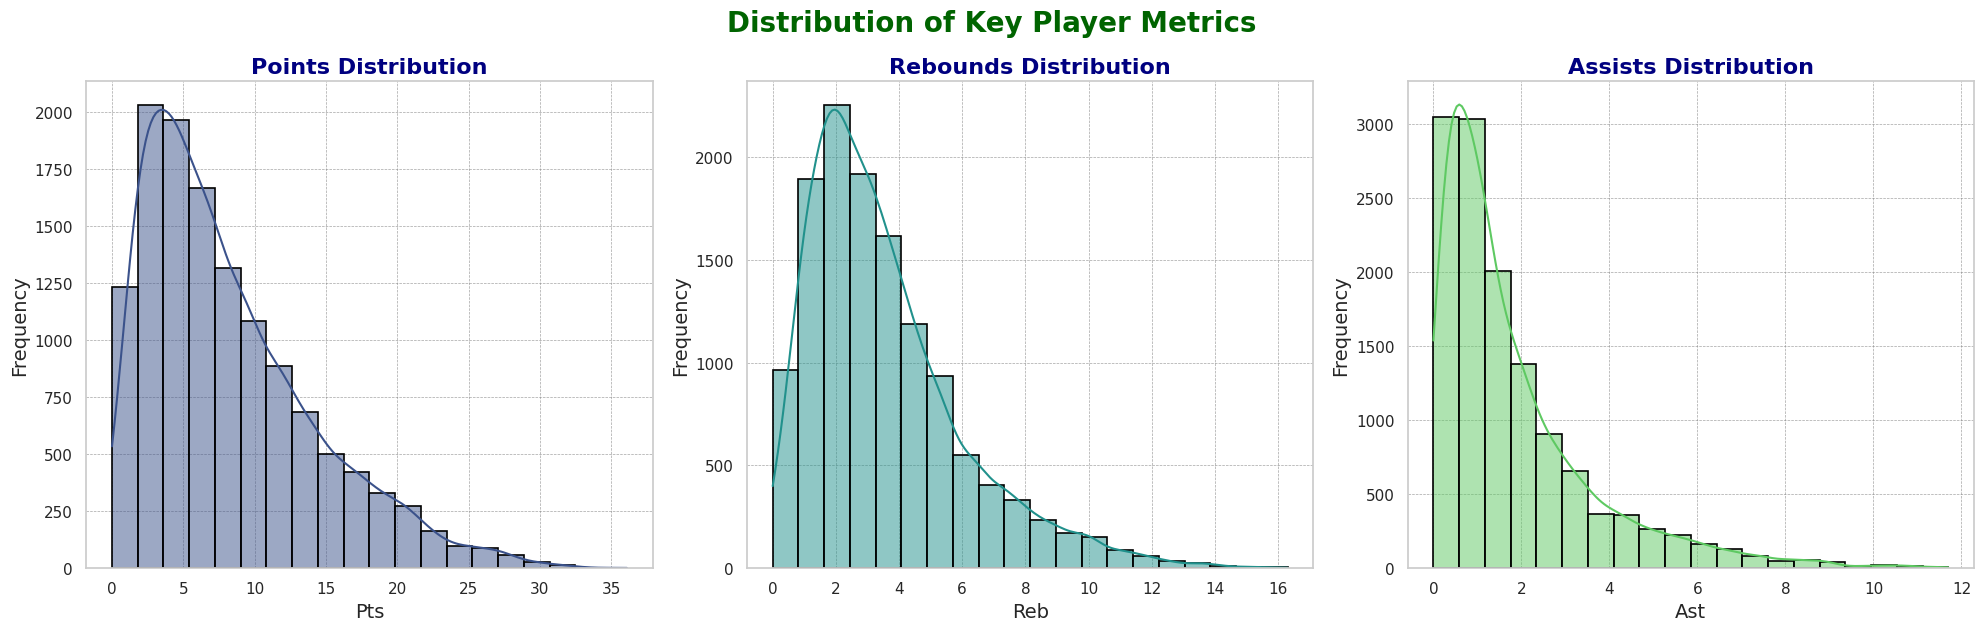

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set an enhanced theme and color palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("viridis", len(key_metrics))

# Create a figure and axes for the subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# List of key metrics to plot and their corresponding titles
key_metrics = ['pts', 'reb', 'ast']
titles = ['Points Distribution', 'Rebounds Distribution', 'Assists Distribution']

# Loop through each axis, metric, and title to generate the histograms
for ax, metric, title, color in zip(axes, key_metrics, titles, palette):
    # Plot a histogram with KDE (Kernel Density Estimation) to visualize distribution
    sns.histplot(
        nba_data[metric], kde=True, ax=ax, color=color, bins=20, edgecolor="black", linewidth=1.2
    )
    # Customize the title and axis labels
    ax.set_title(title, fontsize=16, fontweight='bold', color="navy")
    ax.set_xlabel(metric.capitalize(), fontsize=14, fontweight='medium')
    ax.set_ylabel('Frequency', fontsize=14, fontweight='medium')
    # Add gridlines for better visualization
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Add an overall title for the plots
plt.suptitle("Distribution of Key Player Metrics", fontsize=20, fontweight='bold', color="darkgreen", y=1.05)

# Show the plots
plt.show()


### Correlation Matrix Calculation


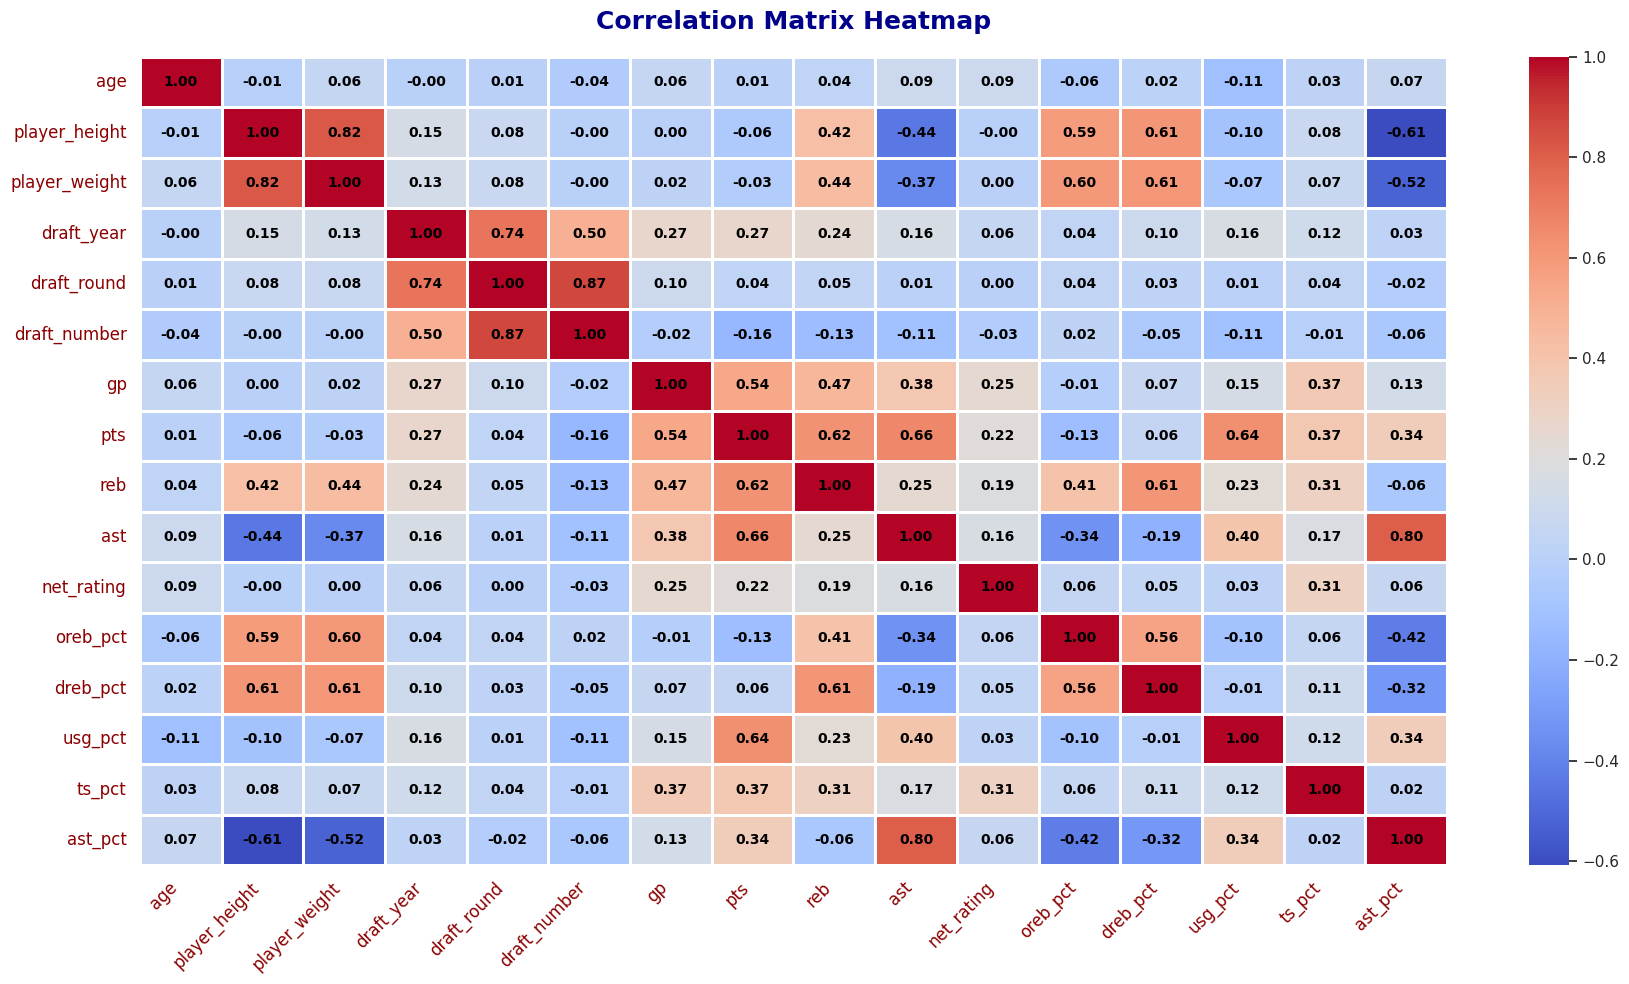

In [25]:
# Compute the correlation matrix
correlation_matrix = nba_data.select_dtypes(exclude=['object']).corr()

# Plot the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1,
    linecolor='white',
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

# Customize the title and axis labels
plt.title("Correlation Matrix Heatmap", fontsize=18, fontweight='bold', color='darkblue', pad=20)
plt.xticks(fontsize=12, fontweight='medium', rotation=45, ha="right", color='darkred')
plt.yticks(fontsize=12, fontweight='medium', rotation=0, color='darkred')

# Add gridlines to separate cells more distinctly
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### Feature Selection

In [15]:
# Correlation with target variable 'pts'
pts_correlation = correlation_matrix['pts']
# Select columns based on the correlation thresholds
selected_columns = pts_correlation[(pts_correlation > 0.2) | (pts_correlation < -0.1)].index.tolist()
# Print the selected columns
print(selected_columns)


['draft_year', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']


In [17]:
X = nba_data[selected_columns].drop(columns = ['pts'])
y = nba_data['pts'] # Set pts as the target variable

### Model Training

In [18]:
# Importing modules for machine learning
from sklearn.model_selection import train_test_split                            # To split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder                 # For feature scaling and encoding categorical variables
from sklearn.linear_model import LinearRegression, Ridge                        # For implementing Linear and Ridge Regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # For model evaluation metrics

#### Data Scaling and Splitting

In [19]:
# Initialize transformers for scaling
scaler = StandardScaler()
# Transform numerical columns
X = scaler.fit_transform(X) # Apply scaling to numerical data
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) # Split the data into training and testing sets (75% for training and 25% for testing)

### Regression Model Training

In [20]:
# Create and train a Linear Regression Model
linear_model = LinearRegression() # Initialize the Linear Regression model
linear_model.fit(X_train, y_train) # Fit the model to the training data

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test) # Use the trained model to make predictions on the test set

# Evaluate the model performance using different metrics
mse_linear = mean_squared_error(y_test, y_pred_linear) # Calculate the Mean Squared Error (MSE)
r_squared_linear = r2_score(y_test, y_pred_linear) # Calculate the R-squared score
mae_linear = mean_absolute_error(y_test, y_pred_linear) # Calculate the Mean Absolute Error (MAE)

### Ridge Model Training

In [21]:
# create and train a Ridge Regression Model with regularization
ridge_model = Ridge(alpha = 1.0) # Initialize the Ridge Regression model with alpha (regularization strength)
ridge_model.fit(X_train, y_train) # Fit the model to the training data

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test) # Use the trained model to make predictions on the test set

# Evaluate the model performance using different metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge) # Calculate the Mean Squared Error (MSE)
r_squared_ridge = r2_score(y_test, y_pred_ridge) # Calculate the R-squared score
mae_ridge = mean_absolute_error(y_test, y_pred_ridge) # Calculate the Mean Absolute Error (MAE)

In [22]:
# Create a comparison dataset using the results of both models
comparison_data = {
    'Metric': ['Mean Squared Error (MSE)', 'R-Squared (R²)', 'Mean Absolute Error (MAE)'],
    'Linear Regression': [mse_linear, r_squared_linear, mae_linear],
    'Ridge Regression': [mse_ridge, r_squared_ridge, mae_ridge]
}

# Convert the dictionary into a DataFrame for better visualization
comparison_df = pd.DataFrame(comparison_data)

# Save the DataFrame to a CSV file
comparison_df.to_csv('model_comparison.csv', index=False)

# Display the comparison dataset as a table
from tabulate import tabulate
print(tabulate(comparison_df, headers='keys', tablefmt='grid'))

+----+---------------------------+---------------------+--------------------+
|    | Metric                    |   Linear Regression |   Ridge Regression |
+====+===========================+=====================+====================+
|  0 | Mean Squared Error (MSE)  |            4.63881  |           4.63894  |
+----+---------------------------+---------------------+--------------------+
|  1 | R-Squared (R²)            |            0.871472 |           0.871468 |
+----+---------------------------+---------------------+--------------------+
|  2 | Mean Absolute Error (MAE) |            1.50017  |           1.50029  |
+----+---------------------------+---------------------+--------------------+


### Linear Regression is preferable due to its marginally better performance and simplicity.